In [1]:
pip install ptitprince


  Using cached ptitprince-0.2.7.tar.gz (12 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached seaborn-0.11.0-py3-none-any.whl (283 kB)
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10659 sha256=c15a43daf15b861621fe8a21c0270c8ffc18703c512ad71fd1cdf10fe15e4e3b
  Stored in directory: c:\users\cipher\appdata\local\pip\cache\wheels\46\11\e3\60e682c8ccb342e9fb4dd76d37514f30475460da4f4a426d3e
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from scipy.stats import levene


In [26]:
data = pd.read_csv("Invisibility Cloak.csv")

In [27]:
print("Dataset:")
print(data.head())

Dataset:
   Participant  Cloak  Mischief
0            1      0         3
1            2      0         1
2            3      0         5
3            4      0         4
4            5      0         6


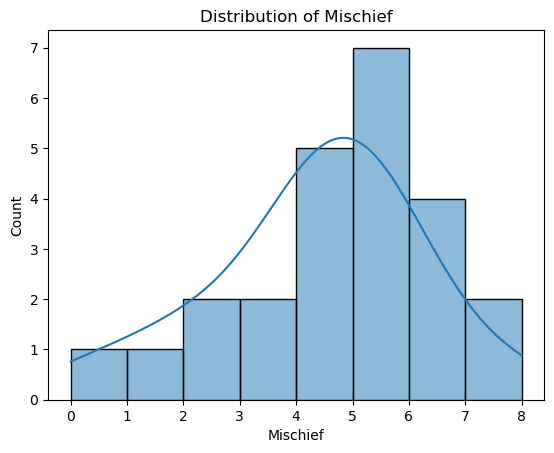

In [28]:
# Assumption 1: 'Mischief' is the dependent variable
sns.histplot(data['Mischief'], kde=True)
plt.title('Distribution of Mischief')
plt.show()

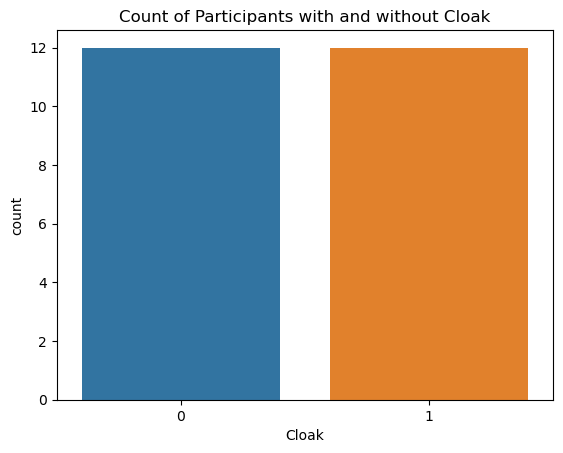

In [29]:
# Assumption 2: 'Cloak' is the independent variable
sns.countplot(x='Cloak', data=data)
plt.title('Count of Participants with and without Cloak')
plt.show()


In [30]:
# Assumption3: "Participant" is a unique identifier for each participant
if data['Participant'].nunique() == data.shape[0]:
    print("Assumption 3 is satisfied: Each participant is present in only one group.")
else:
    print("Assumption 3 is violated: Some participants are present in multiple groups.")


Assumption 3 is satisfied: Each participant is present in only one group.


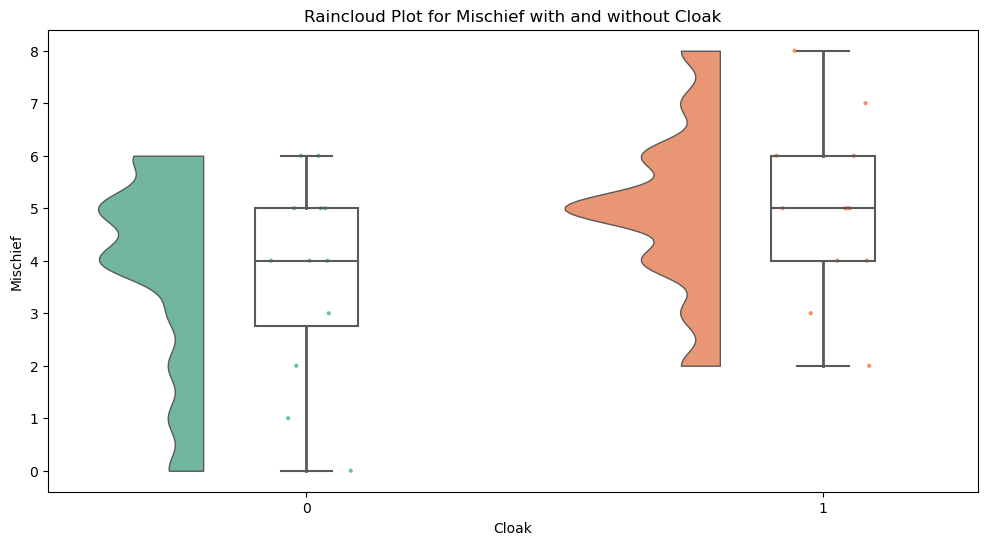

In [31]:
# Assuming 'Mischief' is the dependent variable and 'Cloak' is the independent variable
plt.figure(figsize=(12, 6))
pt.RainCloud(x='Cloak', y='Mischief', data=data, width_viol=0.6, width_box=0.2, palette="Set2")
plt.title('Raincloud Plot for Mischief with and without Cloak')
plt.show()


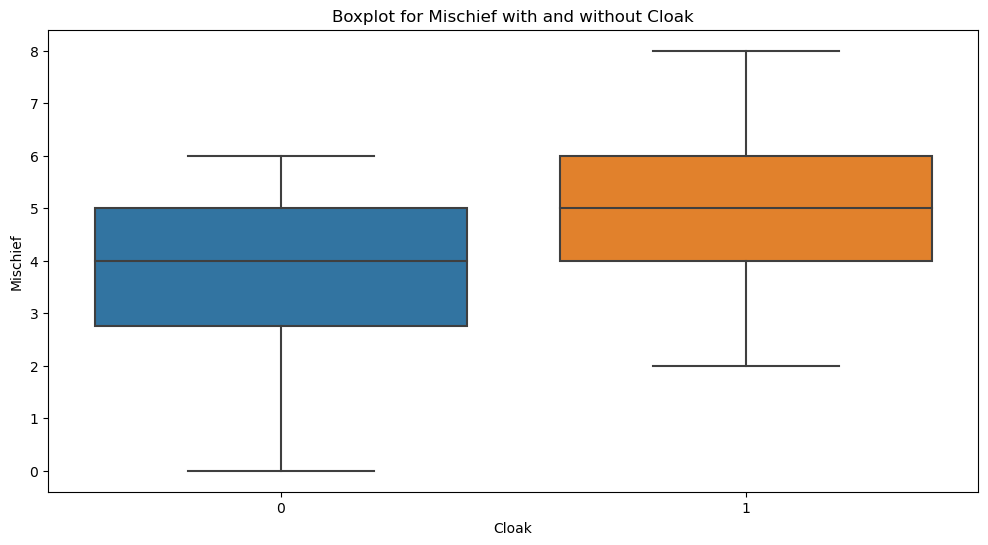

In [32]:
# Assumption 4: Check for outliers in the two groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cloak', y='Mischief', data=data)
plt.title('Boxplot for Mischief with and without Cloak')
plt.show()

In [33]:

# Assumption 5: Normality test for each group using Shapiro-Wilk test
results = {'Cloak': [], 'W-statistic': [], 'P-value': []}

for cloak_group, group_data in data.groupby('Cloak'):
    cloak_group_name = cloak_group
    mischief_values = group_data['Mischief']
    
    w_statistic, p_value = stats.shapiro(mischief_values)
    
    results['Cloak'].append(cloak_group_name)
    results['W-statistic'].append(w_statistic)
    results['P-value'].append(p_value)

normality_table = pd.DataFrame(results)

print(normality_table)

   Cloak  W-statistic   P-value
0      0     0.912764  0.231446
1      1     0.972617  0.936188


In [35]:
# Assumption 6: Levene's test for homogeneity of variances
grouped_data = [group['Mischief'].dropna() for name, group in data.groupby('Cloak')]


statistic, p_value = stats.levene(*grouped_data)


print(f"Levene's Test Results:\n"
      f"Test Statistic: {statistic}\n"
      f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence of a significant difference in variances between groups.")
else:
    print("Fail to reject the null hypothesis. There is no evidence of a significant difference in variances between groups.")


Levene's Test Results:
Test Statistic: 0.2697547683923706
P-value: 0.6086825890641905
Fail to reject the null hypothesis. There is no evidence of a significant difference in variances between groups.


In [36]:
group_with_cloak = data[data['Cloak'] == 'With a cloak']['Mischief']
group_without_cloak = data[data['Cloak'] == 'Without a cloak']['Mischief']


t_statistic, p_value = stats.ttest_ind(group_with_cloak, group_without_cloak)

print(f"Independent Samples t-test Results:\n"
      f"T-statistic: {t_statistic}\n"
      f"P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in Mischief between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Mischief between the two groups.")

Independent Samples t-test Results:
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference in Mischief between the two groups.
